In [1]:
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=7151742c10f86491c155e93889ce630d52fde087e53a3b48639547a2002b9e82
  Stored in directory: c:\users\debor\appdata\local\pip\cache\wheels\d9\dd\68\8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [10]:
import csv 
import pandas as pd
import numpy as np
import math
from geopy.geocoders import Nominatim

# Range Lat&Lng
lat_range = (-90, 90)
lng_range = (-180, 180)

# Import API key
from api_keys import weather_api_key

# Add Citipy 
from citipy import citipy

input_file = "Lat-Log.csv" # file contains ID, Latitude, Longitude
output_file = "City.csv"
df = pd.read_csv("City.csv") 


In [11]:
# List lat_lngs & Cities
lat_lng = []
cities = []

# Set of Random lat&lng
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lng = zip(lat, lng)

# List for lat_lngs & Cities
lat_lng = []
cities = []

# Set of Random lat&lng Combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lng = zip(lat, lng)

# Nearest City for Each lat&lng 
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the City is Unique, Then Add it to a Cities List
    if city not in cities:
        cities.append(city)

# Print the City Count to Confirm Sufficient Count
len(cities)ntify Nearest City for Each lat, lng Combination
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the City is Unique, Then Add it to a Cities List
    if city not in cities:
        cities.append(city)

# Print the City Count to Confirm Sufficient Count
len(cities)

590

In [14]:
# Display the city weather data frame
df = pd.read_csv('City.csv')
df.head(15)

,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,punta arenas,CL,-53.150002,-70.916672,1569207600,90,84,43.97,11.34
1,chokurdakh,RU,70.633331,147.916672,1569207600,0,61,36.52,9.82
2,marienburg,SR,5.846910,-55.021591,1569207600,58,82,82.31,19.17
3,bernardino de campos,BR,-23.013060,-49.474171,1569207600,60,70,59.09,19.77
4,yantal,RU,56.847099,105.254204,1569207600,87,62,62.47,4.68
5,cidreira,BR,-30.181110,-50.205559,1569207600,0,62,51.17,4.43
6,ahipara,NZ,-35.166672,173.166672,1569207600,98,77,66.33,17.47
7,hermanus,ZA,-34.418701,19.234461,1569207600,33,66,55.67,8.43
8,hithadhoo,MV,-0.600000,73.083328,1569207600,95,74,81.95,14.97
9,vaini,TO,-21.200001,-175.199997,1569207600,0,65,67.51,17.74


In [8]:
# Api calls
#setup columns for temperature, humidity, cloudiness, & wind speed
city_list["Max Temperature (F)"] = ""
city_list["Humidity (%)"] = ""
city_list["Cloudiness"] = ""
city_list["Wind Speed (mph)"] = ""

#setup columns for actual lat&lng
city_list["Actual Latitude"] = ""
city_list["Actual Longitude"] = ""

#setup column for country code
city_list["Country"] = ""

#setup column for city datetime
city_list["Datetime (Local)"] = ""
#note that current timezone is PST (-7:00 from GMT)
PST_offset = 7*60*60


base_url_current = "http://api.openweathermap.org/data/2.5/weather"
params = {"q":city_list["City"][0], "units":"imperial", "appid":weather_api_key}

test_response = requests.get(base_url_current, params)
json_response = test_response.json()
# json.dumps(json_response, indent=4)


#data into columns from json object
city_list["Actual Latitude"][0] = json_response["coord"]["lat"]
city_list["Actual Longitude"][0] = json_response["coord"]["lon"]
city_list["Max Temperature (F)"][0] = json_response["main"]["temp_max"]
city_list["Humidity (%)"][0] = json_response["main"]["humidity"]
city_list["Cloudiness"][0] = json_response["clouds"]["all"]
city_list["Wind Speed (mph)"][0] = json_response["wind"]["speed"]
city_list["Country"][0] = json_response["sys"]["country"]
#create datetime
first_city_time = datetime.datetime.fromtimestamp(json_response["dt"]+json_response["timezone"]+PST_offset)
city_list["Datetime (Local)"][0] = first_city_time.strftime("%m/%d/%Y, %H:%M:%S")

#helper function to give the Datetime (UTC) column string
def getTimeString(resp_json, comp_time):
    curr_city_datetime = datetime.datetime.fromtimestamp(resp_json["dt"]+resp_json["timezone"]+comp_time)
    return curr_city_datetime.strftime("%m/%d/%Y, %H:%M:%S")

#create function to add all info to dataframe using the above pattern 
def addColumns(pd_df, resp_json, i, comp_time):
    pd_df["Actual Latitude"][i] = resp_json["coord"]["lat"]
    pd_df["Actual Longitude"][i] = resp_json["coord"]["lon"]
    pd_df["Max Temperature (F)"][i] = resp_json["main"]["temp_max"]
    pd_df["Humidity (%)"][i] = resp_json["main"]["humidity"]
    pd_df["Cloudiness"][i] = resp_json["clouds"]["all"]
    pd_df["Wind Speed (mph)"][i] = resp_json["wind"]["speed"]
    pd_df["Country"][i] = resp_json["sys"]["country"]
    #create datetime.datetime object to give local date and time at the city of interest (need to add an offset from our 
    #computer clock set to PST and then add in the timezone shift given by the API to change from GMT)
    #change it to a string to keep the timestamp the same in case it is examined later
    pd_df["Datetime (Local)"][i] = getTimeString(resp_json, comp_time)

NameError: name 'city_list' is not defined

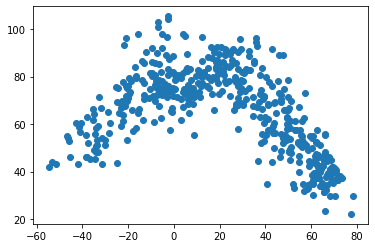

In [44]:
#Latitude vs Temperature Plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline       
plt.scatter(x=df['Lat'], y=df['Max Temp'])
plt.show()

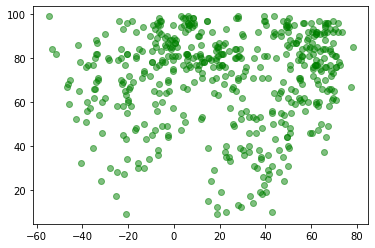

In [50]:
# Latitude vs Humidity Plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline       
plt.scatter(x=df['Lat'], y=df['Humidity'], color='green', alpha=0.5)
plt.show()

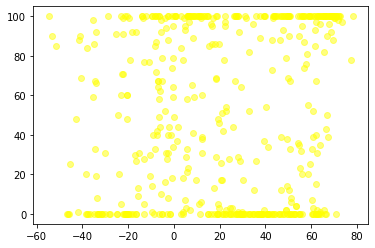

In [51]:
# Latitude vs Cloudiness Plot 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline       
plt.scatter(x=df['Lat'], y=df['Cloudiness'], color='yellow', alpha=0.5)
plt.show()

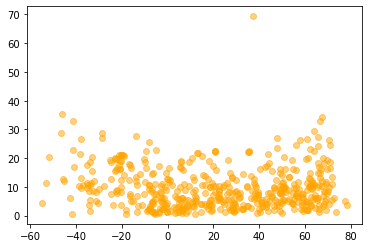

In [52]:
# Latitude vs Wind Speed Plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline       
plt.scatter(x=df['Lat'], y=df['Wind Speed'], color='orange', alpha=0.5)
plt.show()

In [53]:
import pandas as pd


In [55]:
pip install googlemaps

  Created wheel for googlemaps: filename=googlemaps-4.6.0-py3-none-any.whl size=38554 sha256=72e6c4e40ef3b8362eb89f62fb9d294c116bcfbd8c7b1ce80fdd4080bc8f32f7
  Stored in directory: c:\users\debor\appdata\local\pip\cache\wheels\b6\23\aa\a130b53682531f8382dd06f2000001225bea7b56a99c516f87
Successfully built googlemaps



In [10]:
# Dependencies & Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json

# Import API key
from config import g_key

In [ ]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

# Convert Humidity to float and store
weather_df = weather_df.dropna()
humidity = weather_df["Humidity"].astype(float)
# Store 'Latitude' and 'Longitude' into  locations 
locations = weather_df[["Latitude", "Longitude"]].astype(float)
# Create a humidity Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=max(weather_df["Humidity"]),
                                 point_radius = 2)

fig.add_layer(heat_layer)

fig

In [ ]:
# Hotel Maps

hotel_df = filtered_weather_df

#dictionary to update each iteration
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key
}

for index, row in hotel_df.iterrows():
    # get lat, lng from df
    lat = row["Latitude"]
    lng = row["Longitude"]

    # change location each iteration while leaving original params in place
    params["location"] = f"{lat},{lng}"
    
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # assemble url & make API request
    print(f"Retrieving Results for Index {index}: {row['City']}.")
    response = requests.get(base_url, params=params).json()
    # print(json.dumps(response, indent=4, sort_keys=True))
    # extract results
    results = response['results']
    
    try:
        print(f"Closest hotel is {results[0]['name']}.")
        hotel_df.loc[index, 'Hotel Name'] = results[0]['name']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")